In [2]:
from utils import *

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Get the data
dispatched_data = pd.read_csv('../Data/iters_500_cli_internode/20240229-003233_wordcount_round_robin_ndp_False_iters_500.csv')
invoked_data = pd.read_csv('../Data/iters_500_cli_internode/wordcount_worker_hash_ndp_False_iters_500.csv')

# Replace values > 30 with NaN
dispatched_data['Time Taken'] = np.where(dispatched_data['Time Taken'] > 30, np.nan, dispatched_data['Time Taken'])
invoked_data['Time Taken'] = np.where(invoked_data['Time Taken'] > 30, np.nan, invoked_data['Time Taken'])

# Add column for throughput
dispatched_data['Throughput'] = dispatched_data['Batch Size'] / dispatched_data['Time Taken']
invoked_data['Throughput'] = invoked_data['Batch Size'] / invoked_data['Time Taken']



In [4]:
dispatched_data

,Batch Size,Mean Latency,Median Latency,Time Taken,Throughput
0,1,0.216523,0.216523,1.230304,0.812807
1,2,0.221766,0.222196,1.246163,1.604927
2,3,0.219647,0.220693,1.257992,2.384753
3,4,0.217626,0.217278,1.267792,3.155091
4,5,0.220165,0.220101,1.282055,3.899989
...,...,...,...,...,...
494,495,0.960960,0.949597,6.927226,71.457170
495,496,0.960720,0.955695,6.760451,73.367891
496,497,0.956361,0.956218,6.666087,74.556484
497,498,0.944543,0.951816,6.626366,75.154316


In [5]:
invoked_data

,Batch Size,Mean Latency,Median Latency,Time Taken,Throughput
0,1,0.213483,0.213483,1.227330,0.814777
1,2,0.213966,0.216240,1.240050,1.612838
2,3,0.215755,0.215419,1.254509,2.391374
3,4,0.219827,0.219640,1.269112,3.151811
4,5,0.220842,0.220325,1.283828,3.894602
...,...,...,...,...,...
494,495,3.278038,3.025080,10.995066,45.020194
495,496,3.295192,3.199016,10.637108,46.629214
496,497,3.354189,3.103104,10.917224,45.524395
497,498,3.287042,2.965232,10.803652,46.095525


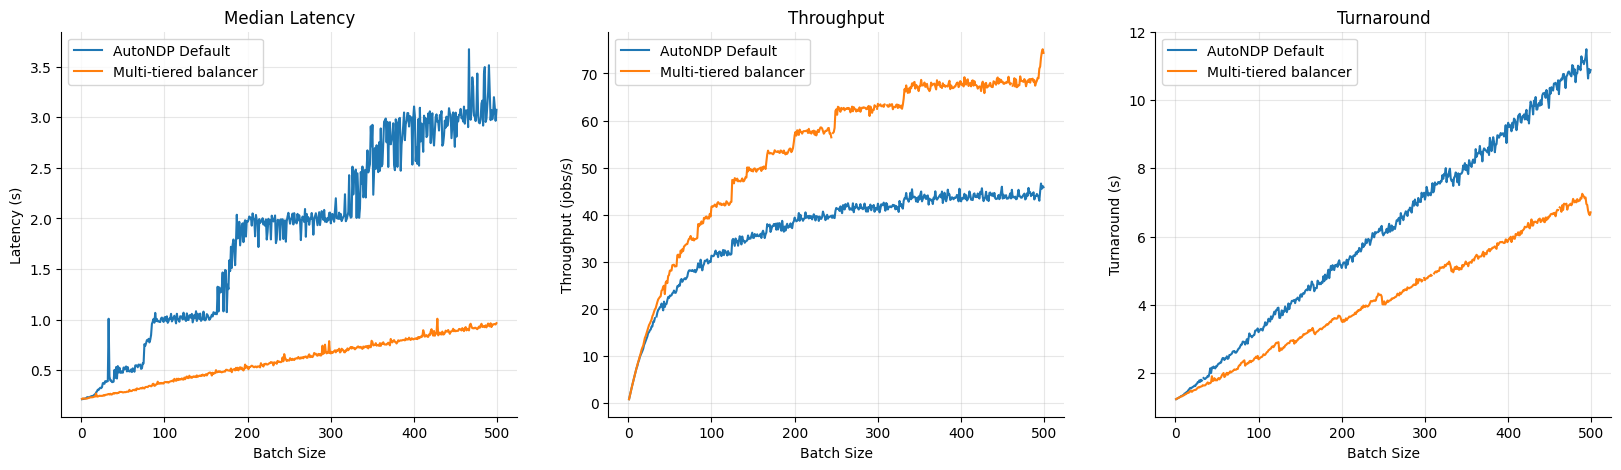

In [6]:
# Plot 3 graphs for throughput, latency and turnaround on single figure
fig, ax = plt.subplots(1,3, figsize=(20, 5))

ax[1].plot(invoked_data['Batch Size'], invoked_data['Throughput'], label='AutoNDP Default')
ax[1].plot(dispatched_data['Batch Size'], dispatched_data['Throughput'], label='Multi-tiered balancer')
ax[1].set_title('Throughput')
ax[1].set_xlabel('Batch Size')
ax[1].set_ylabel('Throughput (jobs/s)')
ax[1].grid(True, alpha=0.3)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()

# Median latency
ax[0].plot(invoked_data['Batch Size'], invoked_data['Median Latency'], label='AutoNDP Default')
ax[0].plot(dispatched_data['Batch Size'], dispatched_data['Median Latency'], label='Multi-tiered balancer')
ax[0].set_title('Median Latency')
ax[0].set_xlabel('Batch Size')
ax[0].set_ylabel('Latency (s)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(True, alpha=0.3)
ax[0].legend()

# Turnaround
ax[2].plot(invoked_data['Batch Size'], invoked_data['Time Taken'], label='AutoNDP Default')
ax[2].plot(dispatched_data['Batch Size'], dispatched_data['Time Taken'], label='Multi-tiered balancer')
ax[2].set_title('Turnaround')
ax[2].set_xlabel('Batch Size')
ax[2].set_ylabel('Turnaround (s)')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].grid(True, alpha=0.3)
ax[2].legend()


#plot_throughput_latency_turnaround(invoked_data, dispatched_data, 'Default faasm invocation', 'Multi-tiered balancer', 'Faasm Default vs Multi-tiered load balancing solution')

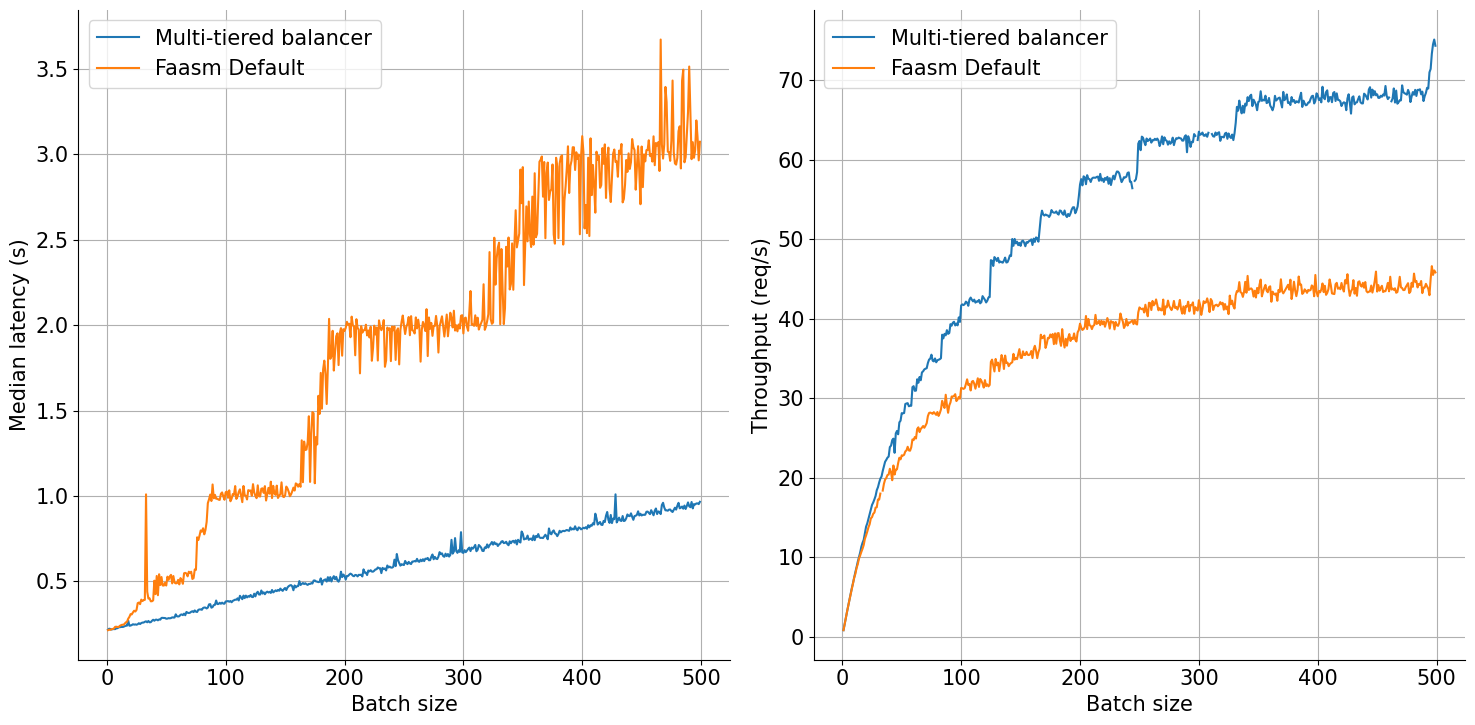

In [15]:
# Plot 2 plots (median latency vs batch size, throughput vs batch size)) on the same figure
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 2, figsize=(15, 7.5))
ax[0].plot(dispatched_data['Batch Size'], dispatched_data['Median Latency'], label='Multi-tiered balancer')
ax[0].plot(invoked_data['Batch Size'], invoked_data['Median Latency'], label='Faasm Default')

ax[1].plot(dispatched_data['Batch Size'], dispatched_data['Throughput'], label='Multi-tiered balancer')
ax[1].plot(invoked_data['Batch Size'], invoked_data['Throughput'], label='Faasm Default')

ax[0].set_xlabel('Batch size')
ax[0].set_ylabel('Median latency (s)')
ax[1].set_ylabel('Throughput (req/s)')
ax[1].set_xlabel('Batch size')
ax[0].legend()
ax[1].legend()
ax[0].grid(True, linestyle='--')
ax[1].grid(True, linestyle='--')

# Remove spine
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Speedup on Median Latency of batches

In [8]:
speedup = invoked_data['Median Latency'] / dispatched_data['Median Latency']
print("Minimum speedup: ", speedup.min())
print("Maximum speedup: ", speedup.max())
print("Mean speedup: ", speedup.mean())
print("Median speedup: ", speedup.median())


Minimum speedup:  0.9731966159037729
Maximum speedup:  4.110986697174182
Mean speedup:  2.8864997012888858
Median speedup:  3.115341629100614


### Speedup up on Mean Latency of batches

In [9]:
speedup = invoked_data['Mean Latency'] / dispatched_data['Mean Latency']
print("Minimum speedup: ", speedup.min())
print("Maximum speedup: ", speedup.max())
print("Mean speedup: ", speedup.mean())
print("Median speedup: ", speedup.median())

Minimum speedup:  0.9648308864254354
Maximum speedup:  7.2975312877380905
Mean speedup:  2.8754499845708095
Median speedup:  3.08875760023511


### Speedup on turnaround of batches

In [10]:
speedup = invoked_data['Time Taken'] / dispatched_data['Time Taken']
print("Minimum speedup: ", speedup.min())
print("Maximum speedup: ", speedup.max())
print("Mean speedup: ", speedup.mean())
print("Median speedup: ", speedup.median())

Minimum speedup:  0.9950947555477588
Maximum speedup:  1.6527937970160356
Mean speedup:  1.4265956681819094
Median speedup:  1.4811810297102124


In [11]:
speedup = invoked_data['Throughput'] / dispatched_data['Throughput']
print("Minimum speedup: ", speedup.min())
print("Maximum speedup: ", speedup.max())
print("Mean speedup: ", speedup.mean())
print("Median speedup: ", speedup.median())


Minimum speedup:  0.6050361526074253
Maximum speedup:  1.0049294244843456
Mean speedup:  0.7097887392376937
Median speedup:  0.675136921106562


# Statistics

In [12]:
# Variance of median latencies in both cases
print("Variance of median latencies in default faasm invoker: ", invoked_data['Median Latency'].var())
print("Variance of median latencies in multi-tiered balancer: ", dispatched_data['Median Latency'].var())


Variance of median latencies in default faasm invoker:  0.840026687987952
Variance of median latencies in multi-tiered balancer:  0.04677810085895207
